<a href="https://colab.research.google.com/github/Amanm22/Introduction-to-Machine-Learning/blob/main/Introduction_to_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [47]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("sample_data/magic04.data" , names = cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [48]:
df["class"] = (df["class"] == "g").astype(int)

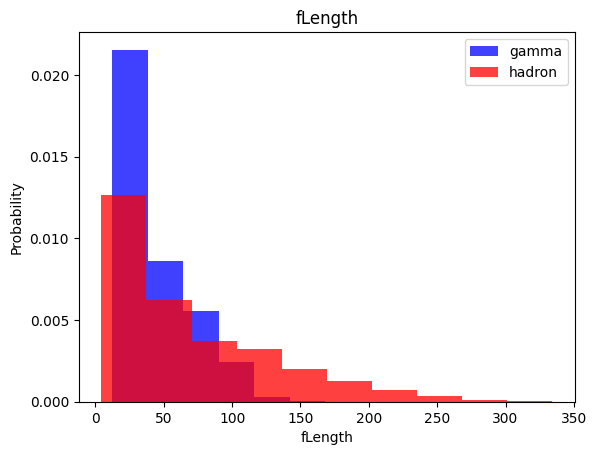

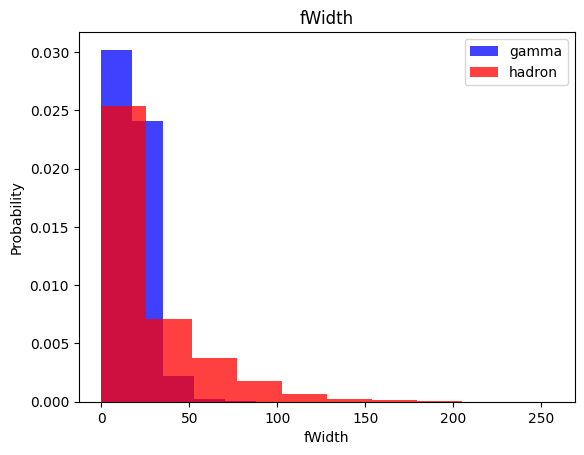

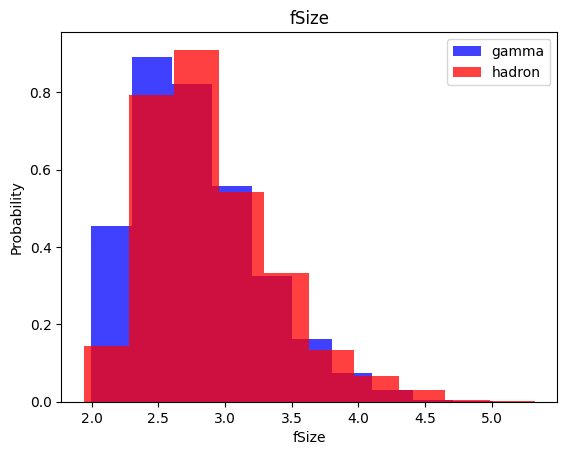

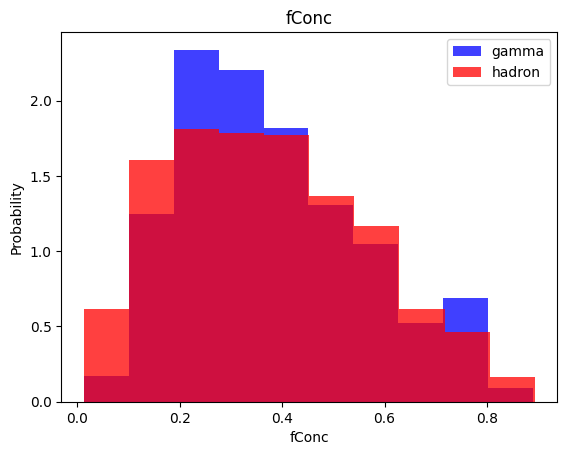

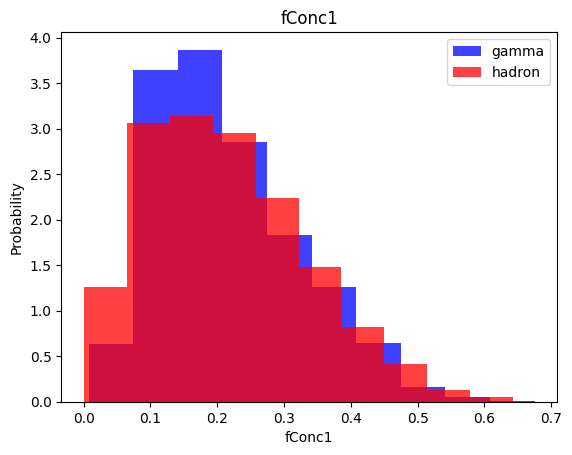

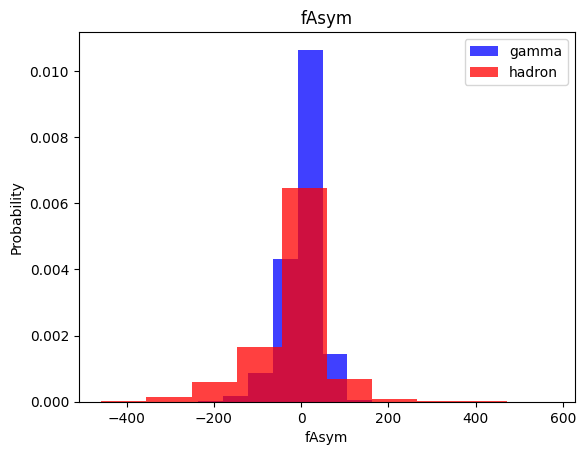

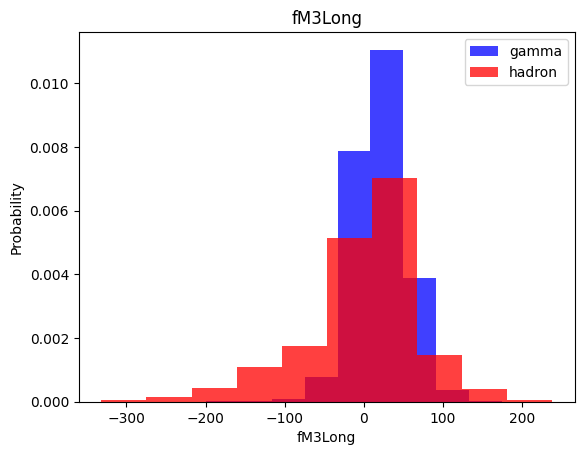

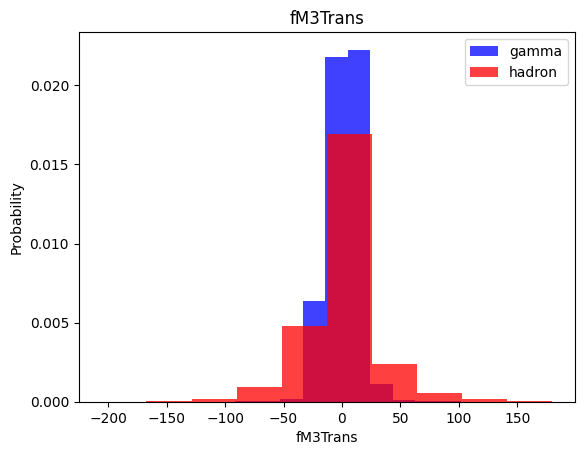

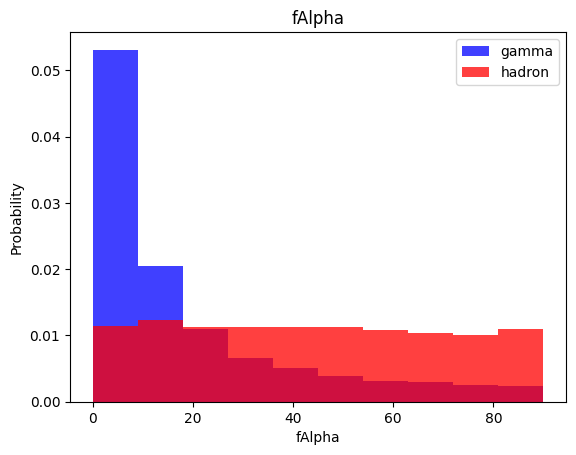

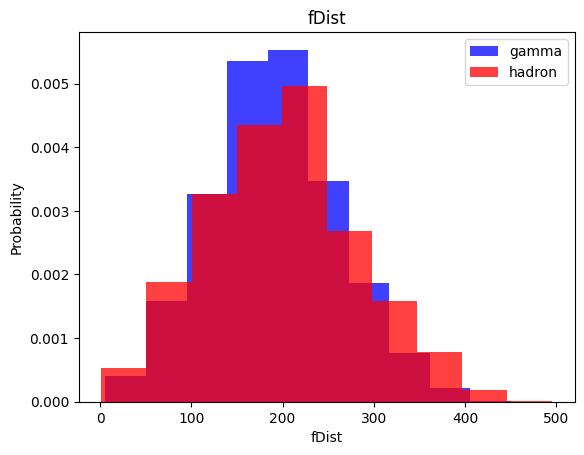

In [49]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label] , color = "blue" , label = 'gamma' , alpha = 0.75 , density = True)
  plt.hist(df[df["class"]==0][label] , color = "red" , label = 'hadron' , alpha = 0.75 , density = True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [50]:
train , valid , test = np.split(df.sample(frac=1) , [int(0.6*len(df)) , int(0.8*len(df))])

In [51]:
def scale_dataset(dataframe , oversample = False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scalar = StandardScaler()
  X = scalar.fit_transform(X)
  if oversample :
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X,y)

  data = np.hstack((X,np.reshape(y,(-1,1))))

  return data, X, y

In [52]:
train , X_train , y_train = scale_dataset(train , oversample = True)
valid , X_valid , y_valid = scale_dataset(valid , oversample = False)
test , X_test , y_test = scale_dataset(test , oversample = False)


KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [54]:
knn_model = KNeighborsClassifier(n_neighbors = 9)
knn_model.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=9)

In [55]:
y_pred = knn_model.predict(X_test)

In [56]:
y_pred

array([1, 1, 1, ..., 1, 1, 0])

In [57]:
y_test

array([1, 1, 1, ..., 1, 1, 0])

In [58]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74      1335
           1       0.85      0.88      0.87      2469

    accuracy                           0.82      3804
   macro avg       0.81      0.80      0.81      3804
weighted avg       0.82      0.82      0.82      3804



# **Naive Bayes**

In [59]:
from sklearn.naive_bayes import GaussianNB

In [60]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train , y_train)

y_pred = nb_model.predict(X_test)
y_pred
y_test

array([1, 1, 1, ..., 1, 1, 0])

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.42      0.52      1335
           1       0.74      0.90      0.81      2469

    accuracy                           0.73      3804
   macro avg       0.72      0.66      0.67      3804
weighted avg       0.72      0.73      0.71      3804



# **Logistic Regression**

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train , y_train)

y_pred = lg_model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 0])

In [64]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1335
           1       0.85      0.83      0.84      2469

    accuracy                           0.80      3804
   macro avg       0.78      0.78      0.78      3804
weighted avg       0.80      0.80      0.80      3804



# **SVM**

In [65]:
from sklearn.svm import SVC

In [66]:
svm_model = SVC()
svm_model = svm_model.fit(X_train , y_train)

y_pred = svm_model.predict(X_test)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1335
           1       0.89      0.90      0.89      2469

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.85      3804
weighted avg       0.86      0.86      0.86      3804

